# A8: Unsupervised Kmeans Clustering

## Setup
Including necessary libraries. New: 
- `matplotlib.pyplot` for additional plotting
- `sklearn.preprocessing` for using `MinMaxScaler` for scaling data
- `sklearn.cluster` for using `KMeans`

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Get Data 
- The dataset is **Mall_Customers.csv**.
- Read the dataset and store in `customers`.

In [2]:
customers = pd.read_csv('Mall_Customers.csv')

## Exploratory Data Analysis (EDA)
Understanding the dataset `customers`:
- `info()` summaries the contents of the dataset.
- `sns.scatterplot(customers)` visualizes the dataset.
- `sns.pairplot(customers[['Annual Income (k$)','Spending Score (1-100)']])` since we are interested in 

In [3]:
customers #display the dataset in customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
customers.info() # display the info of customers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


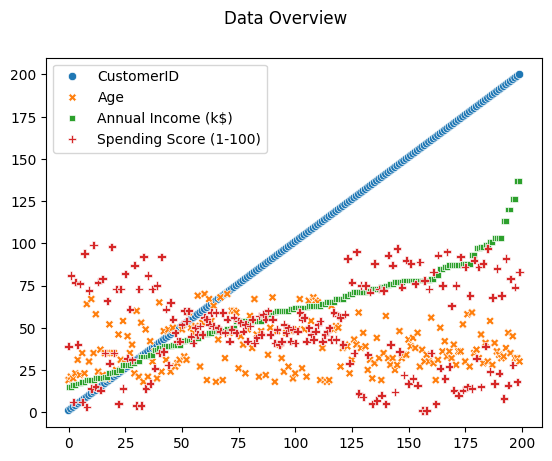

In [5]:
sns.scatterplot(customers) # plotting the customers to overview the dataset
plt.suptitle('Data Overview')
plt.show()

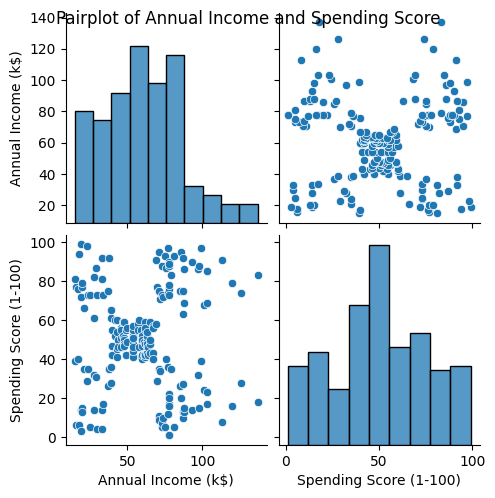

In [6]:
sns.pairplot(customers[['Annual Income (k$)','Spending Score (1-100)']])
plt.suptitle('Pairplot of Annual Income and Spending Score')
plt.show()

### Interpretation
The pairplot reveals that there's no strong linear relationship between Annual Income (k$) and Spending Score (1-100). However, it does indicate potential clusters in the data, suggesting that customers can be segmented based on their income and spending behavior.

## Data Processing
- `customers.isnull().sum()` displays the sum of null values
- `drop(columns='CustomerID')` drops the **CustomerID** since it's not necessary.
    - `drop_first=True` drops the **Gender** column.
- In KMeans clustering, categorical variables like **Gender** can’t be directly used in the algorithm, even when converted to dummy variables. This is because KMeans relies on Euclidean distance, which doesn’t handle binary or categorical data effectively. However, let's still create a dummy variable using `get_dummies()` for **Gender**, called **Gender_Male**.
- Scaling continuous variables:
    - `scaler = MinMaxScaler()` creates an instance.
    - `scaler.fit_transform(customers[continuous_columns])` calculates the min and max values for each column in `continuous_columns` and it immediately applies `transform` using these parameters to scale the data.

In [7]:
customers.isnull().sum() # Checking for null value in customers

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Drop Column/Variable
Dropping the **CustomerID** column since it's not necessary in this analysis using `drop()`.

In [12]:
customers = customers.drop(columns='CustomerID')
customers #display dataframe

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,0.000000,0.387755,True
1,21,0.000000,0.816327,True
2,20,0.008197,0.051020,False
3,23,0.008197,0.775510,False
4,31,0.016393,0.397959,False
...,...,...,...,...
195,35,0.860656,0.795918,False
196,45,0.909836,0.275510,False
197,32,0.909836,0.744898,True
198,32,1.000000,0.173469,True


### Create Dummy Variable

In [8]:
# Create a dummy variable for 'Gender' (if needed for later analysis)
customers = pd.get_dummies(customers, columns=["Gender"], drop_first=True)
customers # display the dataset

### Scale Continuous Variables
Scaling data is important for KMeans, as it ensures that each feature has equal influence on the clustering.
Since the assignment specifies focusing on **"Annual Income (k$)"** and **"Spending Score (1-100)"**, only those columns need to be **normalized** for the clustering.
- `MinMaxScaler` normalizes the variables, bringing their values into the range of 0 to 1.
- `fit_transform()` is used to both fit the scaler (calculate min/max or mean/variance) on the data and then immediately transform the data using these parameters. This saves time by combining both steps.

In [10]:
# Separate the continuous variables
continuous_columns = ["Annual Income (k$)", "Spending Score (1-100)"] # a list 

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler() # create an instance 
customers[continuous_columns] = scaler.fit_transform(customers[continuous_columns])
customers # displays dataframe

### Extract the focused variables
Create a new dataframe with continuous variable for KMeans, this way the processed data still available to others data analytics.

In [13]:
# Your processed data is ready for clustering, focusing on 'Annual Income' and 'Spending Score'
customers2 = customers[continuous_columns]
customers2

## Finding the Number of Cluster, k
- `wcss = []` creates an empty list to store the Within-Cluster Sum of Squares (WCSS) for each value of k.
- Using for loop to iterates through k values from 1 to 10.
    - Using the `KMeans()` to create an instance `kmeans`.
    - Creates a K-Means model with the current value of k, using the `"k-means++"` initialization method and setting the random state for reproducibility.
    - `fit()` fits the K-Means model to the scaled data `customers2`.
    - `append(kmeans.inertia_)` appends/adds the WCSS for the current k to the `wcss` list. WCSS measures the sum of squared distances of data points to their closest cluster center.

In [15]:
# Calculate WCSS for different values of k
wcss = [] # Empty list
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(customers2)
    wcss.append(kmeans.inertia_)  # appending to wcss for each k

## Plot Elbow Method for Optimal k 
- Using the `plt` from `matplotlib.pyplot` to create the plot.

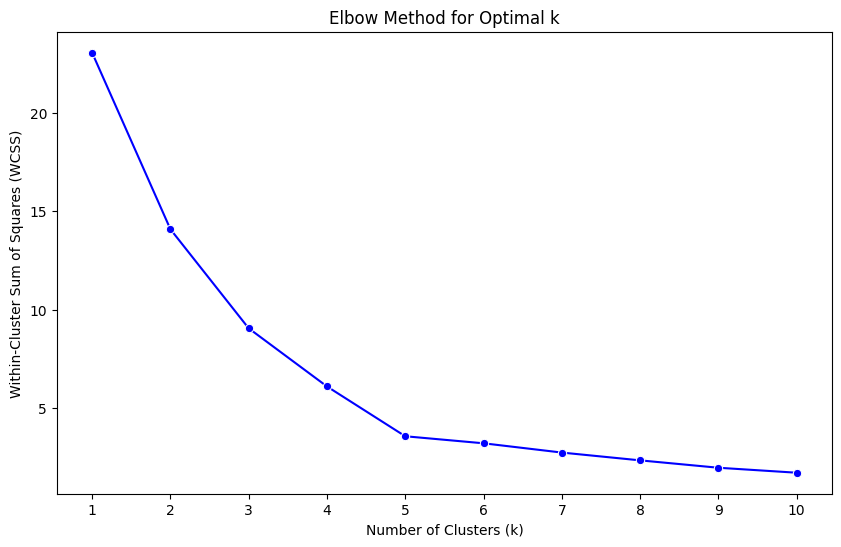

In [16]:
# Plot the WCSS to visualize the Elbow
plt.figure(figsize=(10, 6)) # set the size for the figure width=10, height=6
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='b') # create a line plot, x is range 1-10, y is wcss list, marker style is o, line color is blue
plt.title("Elbow Method for Optimal k") # the plot title
plt.xlabel("Number of Clusters (k)") # x name
plt.ylabel("Within-Cluster Sum of Squares (WCSS)") # y name
plt.xticks(range(1, 11)) #sets the tick marks and labels for the x-axis. It ensures that the x-axis labels correspond to the actual number of clusters used (1 to 10).
plt.show() #display the plot

### Interpretation 
The Elbow Method plot shows a sharp decrease in WCSS from k=1 to k=5, then a more gradual decrease. This suggests that k=5 is an optimal number of clusters for the given dataset.

## Finding the centroids
- `kmeans` creates an instance of `KMeans`.
    - `n_clusters=k` sets the number of clusters to the chosen value (k=5).
    - `init="k-means++"` specifies the initialization method for cluster centers. Here, `"k-means++"` is used, which typically leads to better results compared to random initialization.
    - `random_state=0` sets the random state for reproducibility. This ensures that the same random seed is used for initialization, leading to the same results if re-run the code.
- `fit()` fits the `kmeans` model to the scaled data `customers2`. The model iteratively assigns data points to clusters, recalculates cluster centers, and minimizes the WCSS.
- `labels = kmeans.labels_` This line retrieves the cluster assignment labels for each data point. These labels represent the cluster ID (0 to k-1) that each data point belongs to.
- `centroids = kmeans.cluster_centers_` This line retrieves the centroids of each cluster. Each centroid is a vector representing the average feature values for all data points within that cluster.

In [17]:
k = 5 # found using the Elbow plot from above.

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
kmeans.fit(customers2)

# Get cluster assignments and centroids
labels = kmeans.labels_ # output binary 
centroids = kmeans.cluster_centers_ # output centroids

- Using `SeaBorn` and `matplotlib.pyplot` to plot the Cluters and Centroids
- `sns.scatterplot` replaces `plt.scatter` to display both cluster's colors/labels and the centroids

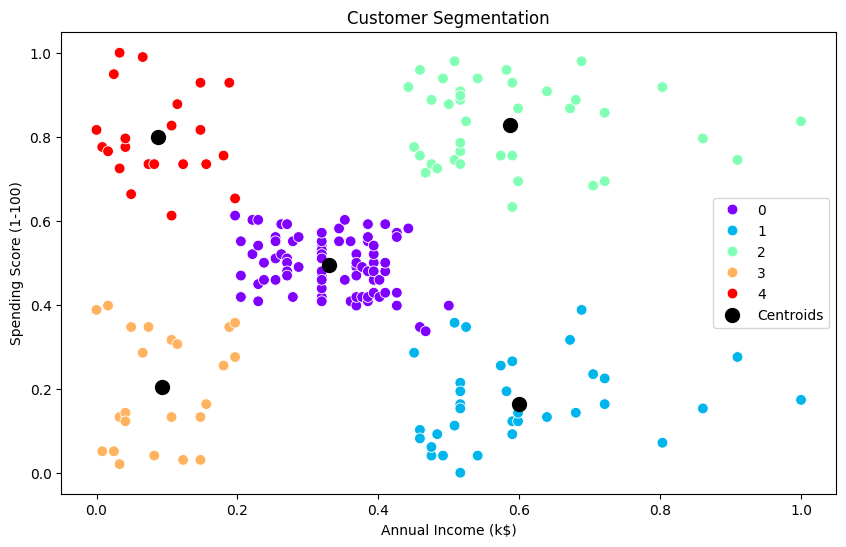

In [30]:
# Visualize the clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customers, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", palette="rainbow", s=60)
# plt.scatter(customers2['Annual Income (k$)'], customers2['Spending Score (1-100)'], c=labels, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Interpretation
The plot visualizes customer segmentation based on `Annual Income (k$)` and `Spending Score (1-100)`. Each dot represents a customer, and the color indicates the cluster. Black dots are cluster centroids.<br>

Cluster Interpretation:
- Cluster 1 (Red): High-income, high-spenders.
- Cluster 2 (Green): High-income, low-spenders.
- Cluster 3 (Purple): Average-income, average-spenders.
- Cluster 4 (Orange): Low-income, high-spenders.
- Cluster 5 (Blue): Low-income, low-spenders.
  
Marketing Implications:
- Cluster 1: Offer exclusive products and personalized services.
- Cluster 2: Target with value-added offers and promotions.
- Cluster 3: Offer budget-friendly options and loyalty programs.
- Cluster 4: Attract with affordable products and clear value propositions.
- Cluster 5: Identify specific needs and offer tailored products or services.

In [19]:
# Optional: Print final centroids
print("Final Centroids:\n", centroids)

Final Centroids:
 [[0.33029751 0.49508692]
 [0.6        0.16443149]
 [0.58638083 0.82783883]
 [0.09265859 0.20319432]
 [0.08792846 0.79962894]]


## Others

- `customers['Cluster'] = labels` adds a new column named "Cluster" to the customers DataFrame. 
- `gender_distribution = customers.groupby(['Cluster', 'Gender_Male']).size().unstack()` performs a groupby operation to analyze the gender distribution within clusters. It also count the number of customer in each group and converts the grouped data into a DataFrame, where rows represent clusters and columns represent genders
- `plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])` plots with bar chart, stacks the bars, set figure size and colors.

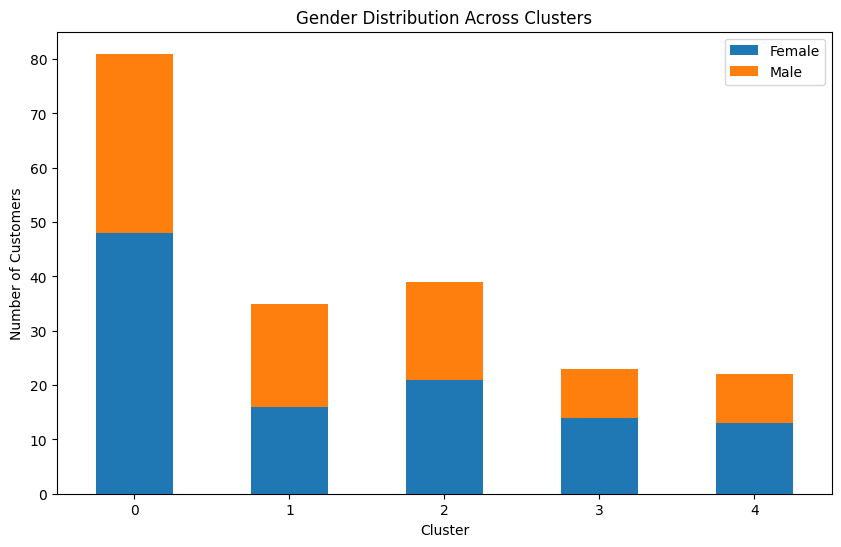

In [20]:
customers['Cluster'] = labels

# Group by cluster and gender, then count occurrences
gender_distribution = customers.groupby(['Cluster', 'Gender_Male']).size().unstack()

# Plot stacked bar chart for gender distribution within clusters
gender_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0) #Rotates the x-axis tick labels by 0 degrees to avoid overlapping for multiple clusters.
plt.legend(['Female', 'Male']) # legend
plt.show()

### Interpretation
The plot shows the gender distribution across different customer clusters. Each cluster has a varying proportion of male and female customers. This information can be used to tailor marketing strategies to specific clusters. For example, Cluster 1 has a more balanced gender distribution.